House Price Prediction

Anju Ann Paul- Final Project

Objective:
1. Predict the price for a given set of variables.
2. Find the dependent variable for housing price and how dependent they are. Depending on the dependency, a buyer on budget can be made aware on the variables to compromise on.

Dataset Courtesy - kaggle

Dataset contains 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa that may influences final price of each home.

In [1]:
# Import the pandas library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Use pandas read_csv function to import the data into a dataframe variable
df=pd.read_csv('Dataset.csv')

Data doesnot have missing data entry. So cleaning won't be necessary.

Summary statistics 

In [3]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [4]:
# rows and columns of the dataframe
df.shape

(1460, 81)

In [5]:
# First 2 rows of the dataframe
df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


<AxesSubplot:ylabel='Frequency'>

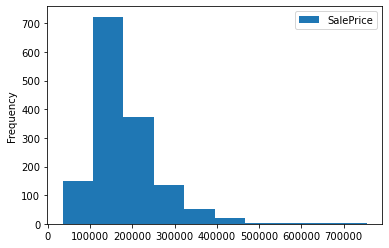

In [6]:
#Sale Price of homes
df.plot(kind='hist',y='SalePrice')

In [7]:
#Mean price
Col1 = df.loc[:,'SalePrice']
print("Mean is",Col1.mean())

Mean is 180921.19589041095


In [8]:
#Median price
print("Median is",Col1.median())

Median is 163000.0


In [9]:
print("Mode is ",Col1.mode())

Mode is  0    140000
dtype: int64


In [10]:
print("Mean Absolute Deviation(MAD) is",Col1.mad())

Mean Absolute Deviation(MAD) is 57434.770275849274


In [11]:
print("Standard Deviation(STD) is",Col1.std())

Standard Deviation(STD) is 79442.50288288663


In [12]:
#interquartile range (the difference of the 75% and 25% quantile)
print("75% quantile is",Col1.quantile(0.75))
print("25% quantile is",Col1.quantile(0.25))
print("Interquartile range (IQR) is",Col1.quantile(0.75) - Col1.quantile(0.25))

75% quantile is 214000.0
25% quantile is 129975.0
Interquartile range (IQR) is 84025.0


<AxesSubplot:>

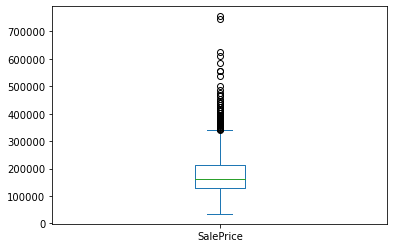

In [13]:
Col1.plot(kind='box',y='SalePrice')

In [14]:
OC = df.loc[:,'OverallCond']
c1=c2=c3=c4=c5=c6=c7=c8=c9=c10=0   
for i in range(0,len(OC)):
    if OC[i]==1:
       c1+=1
    elif OC[i]==2:
       c2+=1
    elif OC[i]==3:
       c3+=1
    elif OC[i]==4:
       c4+=1
    elif OC[i]==5:
       c5+=1
    elif OC[i]==6:
       c6+=1
    elif OC[i]==7:
       c7+=1
    elif OC[i]==8:
       c8+=1
    elif OC[i]==9:
       c9+=1
    elif OC[i]==10:
       c10+=1       

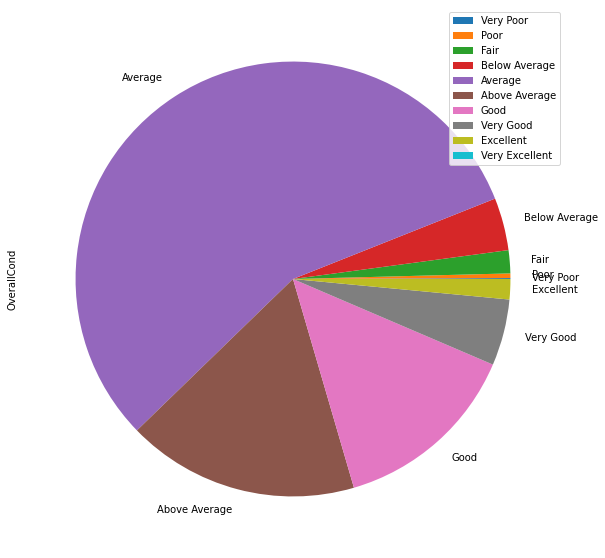

In [15]:
a = pd.DataFrame({'OverallCond': [c1,c2,c3,c4,c5,c6,c7,c8,c9,c10 ]}, index=['Very Poor',
                                                                          'Poor',
                                                                          'Fair',
                                                                          'Below Average',
                                                                          'Average',
                                                                          'Above Average',
                                                                          'Good',
                                                                         'Very Good',
                                                                          'Excellent',
                                                                         'Very Excellent'])
    
       

plot = a.plot.pie(y='OverallCond', figsize=(10, 10))

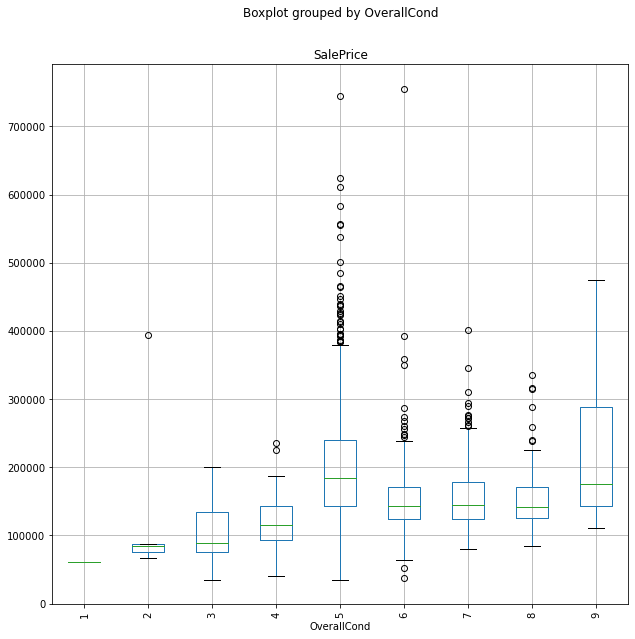

In [16]:
#Boxplot
ax = df.boxplot(by='OverallCond', column='SalePrice',
                           figsize=(10, 10),rot=90)

<AxesSubplot:xlabel='OverallCond', ylabel='SalePrice'>

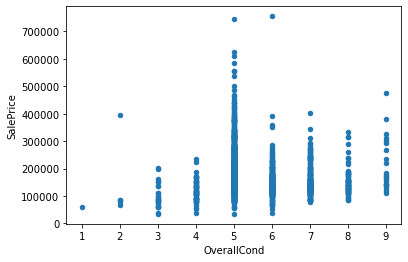

In [17]:
#Scatterplot
df.plot.scatter(x='OverallCond',y='SalePrice')

<AxesSubplot:xlabel='OverallCond', ylabel='SalePrice'>

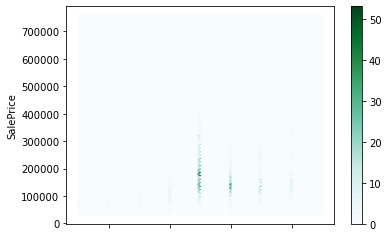

In [21]:
#Hexagonal binning plot
df.plot.hexbin(x='OverallCond',y='SalePrice')

In [29]:
Bldty = df.loc[:,'BldgType']
c1=c2=c3=c4=c5=c6=c7=c8=c9=c10=0   
for i in range(0,len(Bldty)):
    if Bldty[i]=='1Fam':
       c1+=1
    elif Bldty[i]=='2fmCon':
       c2+=1
    elif Bldty[i]=='Duplex':
       c3+=1
    elif Bldty[i]=='TwnhsE':
       c4+=1
    elif Bldty[i]=='Twnhs':
       c5+=1

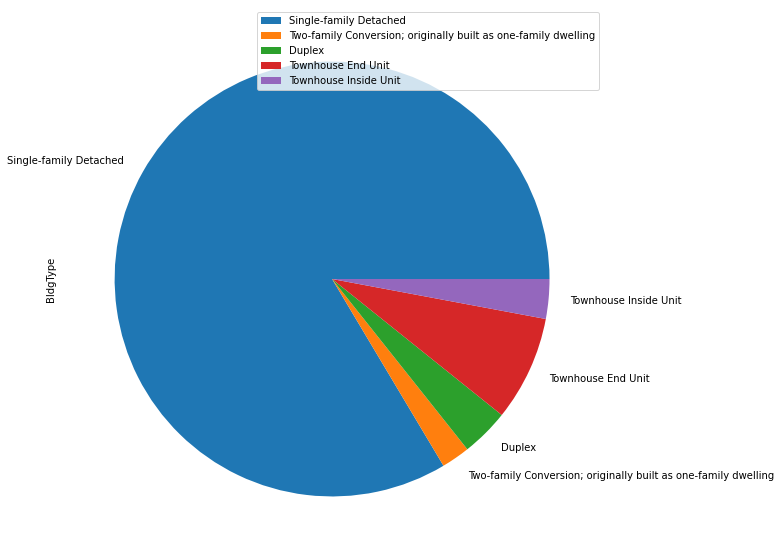

In [30]:
b = pd.DataFrame({'BldgType': [c1,c2,c3,c4,c5]}, index=['Single-family Detached',
                                                            'Two-family Conversion; originally built as one-family dwelling',
                                                            'Duplex',
                                                            'Townhouse End Unit',
                                                            'Townhouse Inside Unit'])
    
       

plot = b.plot.pie(y='BldgType', figsize=(10, 10))

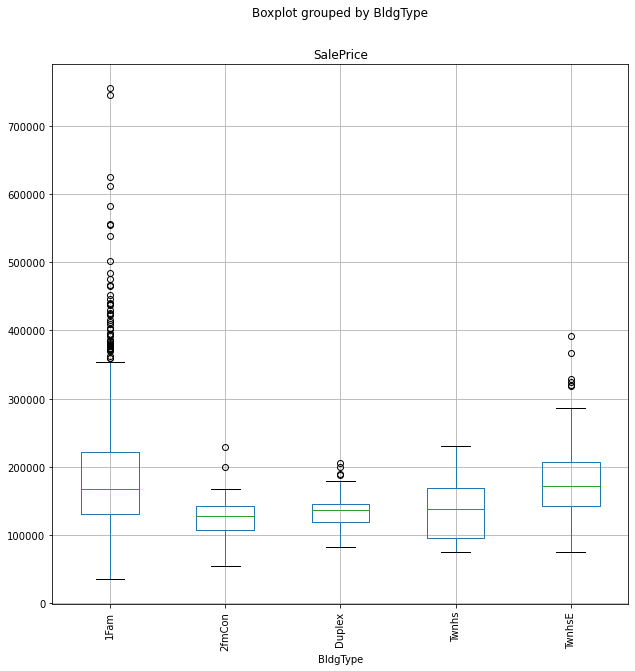

In [31]:
#Boxplot
ax = df.boxplot(by='BldgType', column='SalePrice',
                           figsize=(10, 10),rot=90)

<AxesSubplot:xlabel='BldgType', ylabel='SalePrice'>

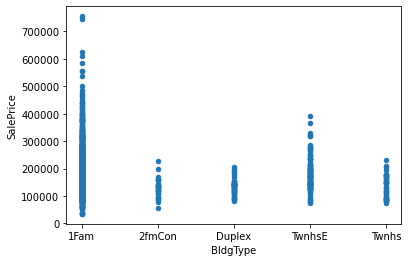

In [35]:
#Scatterplot
df.plot.scatter(x='BldgType',y='SalePrice')